<a href="https://colab.research.google.com/github/gummy-brain/Leader-Appeal-in-Times-of-War/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=30d34d041dfe8b8f16c4b1feea15513227d0585c2ccf7759acf424bafb757e87
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=0a9144f14b1cee9c01b13aa2e958199b80f4c635ae47c6e5e215dd98b7852db9
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.0 MB/s 


In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 9.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=42c53f23ab80f542e845b1dc9f6ea58cf6508492bb76798ab9008daa7d1d1ce2
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
from langdetect import detect
from langdetect import detect_langs

pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
pro_russia = pd.read_pickle('/content/drive/MyDrive/pro_russia_tweets.pkl')

pro_russia = pro_russia.drop_duplicates(subset= ["text"])

pro_russia.shape

(18342, 28)

In [ ]:
Putin = pro_russia[pro_russia['text'].str.contains(pat="putin")]
Putin = Putin[~Putin['text'].str.contains(pat="zelensky")]

Putin.shape

(13128, 28)

In [ ]:
pro_Ukraine = pd.read_pickle('/content/drive/MyDrive/pro_Ukraine_tweets.pkl')

pro_Ukraine = pro_Ukraine.drop_duplicates(subset= ["text"])

pro_Ukraine.shape

(686830, 28)

In [ ]:
pro_Ukraine['text'] = pro_Ukraine['text'].map(str)
Zelensky = pro_Ukraine[pro_Ukraine['text'].str.contains(pat="zelensky|zelenski", na=False)]
Zelensky = Zelensky[~Zelensky['text'].str.contains(pat="putin")]

Zelensky.shape

(22863, 28)

In [ ]:
#Zelensky = Zelensky[Zelensky['text'].str.contains(pat = "zelensky")]
#Zelensky.shape

(21773, 28)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def positive_sentiment(row):
    scores = analyzer.polarity_scores(row['text'])
    positive_sentiment = scores['pos']
    return positive_sentiment

def neutral_sentiment(row):
    scores = analyzer.polarity_scores(row['text'])
    neutral_sentiment = scores['neu']
    return neutral_sentiment

def negative_sentiment(row):
    scores = analyzer.polarity_scores(row['text'])
    negative_sentiment = scores['neg']
    return negative_sentiment

def compound_sentiment(row):
    scores = analyzer.polarity_scores(row['text'])
    compound_sentiment = scores['compound']
    return compound_sentiment


leaders = [Putin, Zelensky]

In [ ]:
for leader in leaders:
    leader.text = leader.text.str.replace(r'https?:\/\/.*\s?', '')
    leader.text = leader.text.str.replace(r'pic\.twitter\.com\/.*\s?', '')
    leader.text = leader.text.str.replace(r'@[A-Za-z0-9_]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
# Run sentiment analysis on every tweet for every candidate and add scores to the dataframe
for leader in leaders:
    leader['positive_sentiment'] = leader.apply(positive_sentiment, axis=1)
    leader['neutral_sentiment'] = leader.apply(neutral_sentiment, axis=1)
    leader['negative_sentiment'] = leader.apply(negative_sentiment, axis=1)
    leader['compound_sentiment'] = leader.apply(compound_sentiment, axis=1)

names = ['Putin', 'Zelensky']

In [ ]:
# Create sentiment analysis dictionary with averages
idx = 0
sentiment = {}
for leader in leaders:
    sentiment[names[idx]] = {'positive': leader['positive_sentiment'].mean(), 'neutral': leader['neutral_sentiment'].mean(),
                              'negative': leader['negative_sentiment'].mean(), 'compound': leader['compound_sentiment'].mean()}
    idx += 1

sentiment

{'Putin': {'positive': 0.10247151127361366,
  'neutral': 0.7883019500304693,
  'negative': 0.10877041438147472,
  'compound': -0.04753407221206581},
 'Zelensky': {'positive': 0.14151301229060054,
  'neutral': 0.7923866509207016,
  'negative': 0.06522416130866465,
  'compound': 0.195299343918121}}

In [ ]:
# Mark each tweet as either positive or negative depending on higher sentiment value
def positive(row):
    if row['positive_sentiment'] > row['negative_sentiment']:
        return 1
    else:
        return 0

def negative(row):
    if row['negative_sentiment'] > row['positive_sentiment']:
        return 1
    else:
        return 0


for leader in leaders:
    leader['positive_tweet'] = leader.apply(positive, axis=1)
    leader['negative_tweet'] = leader.apply(negative, axis=1)

In [ ]:
# Create dictionary with average tweet positivity and negativity per candidate
count = 0
pos_neg = {}
for leader in leaders:
    pos_neg[names[count]] = {'positive': (leader['positive_tweet'].sum() / len(leader)), 'negative': (leader['negative_tweet'].sum() / len(leader))}
    count += 1

pos_neg


sentiment_df = pd.DataFrame(pos_neg).T
sentiment_df

,positive,negative
Putin,0.386578,0.436319
Zelensky,0.520273,0.259327


Text(0, 0.5, '% of Tweets')

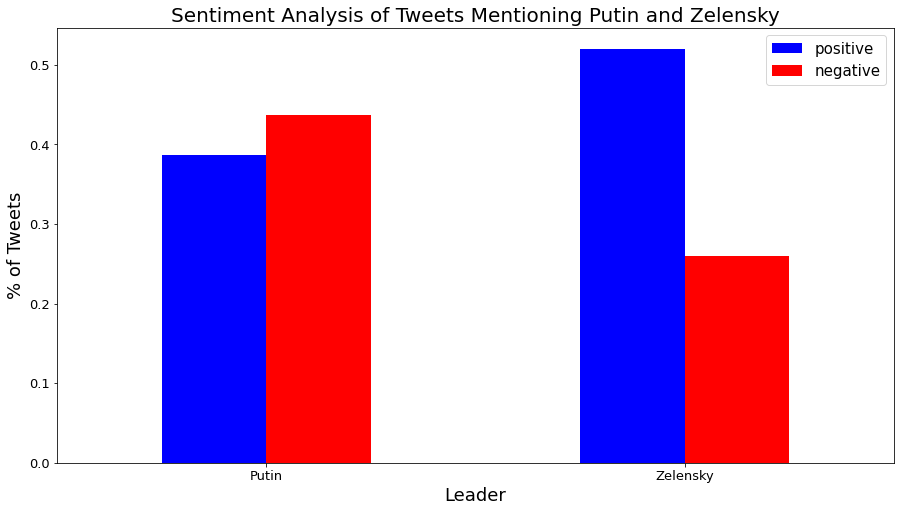

In [ ]:
# Plot these positive and negative scores in double bar chart
sentiment_df.plot(kind='bar', figsize=(15,8), color=['b', 'r'])
plt.title('Sentiment Analysis of Tweets Mentioning Putin and Zelensky', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13)
plt.xlabel('Leader', fontsize=18)
plt.ylabel('% of Tweets', fontsize=18)

In [ ]:
Putin.positive_tweet.value_counts()

0    8053
1    5075
Name: positive_tweet, dtype: int64

In [ ]:
Zelensky.positive_tweet.value_counts()

1    11895
0    10968
Name: positive_tweet, dtype: int64

In [ ]:
# Export cleaned csv files for topic modeling
Putin.to_csv('Putin_cleaned.csv', index=False)
Zelensky.to_csv('Zelensky_cleaned.csv', index=False)